# Introducción a Pandas para el analisis de datos  

Por: [Ivan Torroledo](https://github.com/torroledo) 

### Este notebook hace parte del curso [**Introducción a la ciencia de datos**](https://github.com)

<p float="left">
  <img src="../imagenes/pandas-logo.svg.png" alt="drawing" width="200"/>
  <img src="../imagenes/mck-logo.png" alt="drawing" width="150"/>
</p>

### Introducción 

Para el análisis avanzado de datos buscamos una estructura que permita organizar, manejar y transformar la información usada durante el análisis estadístico. Pocos lenguajes poseen esta estrcutura optima siendo algunos de ellos **`R`** y las estructuras **dataframe** (tablas) que tienen un origen nativo con el propio lenguaje de programación.

En el año 2008 surgió la liberia **Pandas** como una alternativa de Python para el manejo de datos estrcuturados en forma de tablas para tareas de análisis de datos y series temporales. Algunas de sus características principales son:

* Uso de objeto `DataFrame` para la manipulación de datos con indexación integrada
* Herramientas para leer y escribir datos entre estructuras de datos en memoria y diferentes formatos de archivo
* Alineación de datos y manejo integrado de datos faltantes
* Acciones de reformato y pivote de conjuntos de datos (similar a las tablas dinámicas de **`Excel`**!)
* Inserción y eliminación de columnas y filas 
* Agrupación por valor permitiendo operaciones de agregación (`groupby`, herramienta indispensable para el tratamiento de datos)
* Operaciones de unión de tablas (simulando la lógica de **`SQL`**)
* Funcionalidad de **series de tiempo**: generación de rango de fechas y conversión de frecuencia, estadísticas de ventana móvil, regresiones lineales de ventana móvil

**¿Por qué el nombre Pandas...?**

### Objetivos

* Reforzar el conocimiento sobre la estructura básica `DataFrame` y sus principales operaciones y atributos
* Operar datos estructurados de forma algebráica para crear nueva información 
* Construir operaciones de agregación usando la función `groupby`
* Crear estadísticas descriptivas básicas usando funciones *built-in* de pandas 
* Trabajar en el análisis de series temporales





Para iniciar debemos importar la librería:

In [1]:
import pandas as pd
import numpy as np

### Series 

Antes de iniciar con el trabajo con tablas (`DataFrame`), **Pandas** nos proporciona una estructura más simple y que a partir de la unión de varias de éstas podemos crear tablas.  Las series (`Series`) de **Pandas** son estructuras que permiten guardar informacion de una variable individualmente. Comparativamente con una tabla, una serie es una columna de la tabla usual que conocemos, de modo que la unión de multiples `Series` horizontalmente daría una tabla `DataFrame` en la lógica de **Pandas**.

Para definirla debemos acceder a la función `Series()` de la librería **Pandas** y proporcionarle la información a través de una lista:

In [3]:
serie = pd.Series([2, 4, 6, 8, 10, 12, 14])
print('El tipo de objeto es:',type(serie))
serie

El tipo de objeto es: <class 'pandas.core.series.Series'>


0     2
1     4
2     6
3     8
4    10
5    12
6    14
dtype: int64

En primer lugar, encontramos que el tipo de objeto que hemos creado es un `pandas.core.series.Series`. De ahora en adelante veremos que todo tipo de objeto definido en tope de las predefinidas por Python harán referencia a la librería de la cual provienen ya que ahí se encuentran definidos. 

Segundo, observamos que como salida al mostrar la serie creada tenemos:

* Indice: referencia o posición un valor al interior de la serie. En nuestro caso es este índice es `[0,1,2,3,4,5,6]`
* Valores: valores que definen serie. En nuestro caso es `[2, 4, 6, 8, 10, 12, 14]`
* Tipo de contenido: tipo de datos que tenemos en nuestra serie. En nuestro caso es `dtype: int64` o simplemente valores enteros

A pesar que podemos ver estos atributos cuando observamos la serie después de su creación, es aún más conveniente acceder a cada atributo de forma individual. Por ejemplo podemos:

In [5]:
# Valores de la serie
serie.values

array([ 2,  4,  6,  8, 10, 12, 14])

In [6]:
# Indices de la serie 
serie.index, serie.index.values

(RangeIndex(start=0, stop=7, step=1), array([0, 1, 2, 3, 4, 5, 6]))

Este último nos da el índice como un `RangeIndex` o los valores como un arreglo de **Numpy**. Finalmente, si queremos validar el tipo de dato, podemos:

In [8]:
# Tipo de dato de la serie
serie.dtype

dtype('int64')

### Más formas de crear `Series` 

Ya vimos la versión básica para crear una serie, sin embargo encontramos que una serie tiene más información que los valores que le proporcionamos en un inicio. De modo que, creemos una serie nuevamente pero personalizando aun más su contenido:

In [10]:
serie = pd.Series(
    data = [2, 4, 6, 8, 10, 12, 14], 
    index = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'],
    name = 'Tabla del 2'
)
serie

x1     2
x2     4
x3     6
x4     8
x5    10
x6    12
x7    14
Name: Tabla del 2, dtype: int64

Aquí asignamos nuevamente los mismos valores que en el primer ejemplo, pero esta vez le asignamos un **índice** adecuado al próposito y un **nombre** explicativo. Como vemos el índice no tiene que ser numérico (u ordedano).

Ahora creemos una `Serie` pero partiendo de un diccionario en lugar de una lista: 

In [11]:
tabla_del_3 = {
    'x3' : 9, 
    'x1' : 3, 
    'x2' : 6, 
    'x4' : 12
}
serie2 = pd.Series(tabla_del_3, name='Tabla del 3')
serie2

x3     9
x1     3
x2     6
x4    12
Name: Tabla del 3, dtype: int64

### Operaciones con `Series` 

Ahora hagamos algunas operaciones básicas con las `Series` creadas:

In [13]:
# Multiplicación escalar 
serie * -1

x1    -2
x2    -4
x3    -6
x4    -8
x5   -10
x6   -12
x7   -14
Name: Tabla del 2, dtype: int64

In [14]:
## Potenciación punto a punto
serie2 **2

x3     81
x1      9
x2     36
x4    144
Name: Tabla del 3, dtype: int64

Cuando queremos operar dos `Series`, **Pandas** usa el índice como una referencia del valor en cada fila para operar valores con la misma referencia (índice), por ejemplo:

In [15]:
serie + serie2

x1     5.0
x2    10.0
x3    15.0
x4    20.0
x5     NaN
x6     NaN
x7     NaN
dtype: float64

Donde el valor `NaN` surge porque **Pandas** no encontró referencia de pareja para algunos de nuestros valores en la primer serie. `NaN` (***Not a Number***) es un un tipo de valor asignado en muchos lenguajes de programación para denotar elementos que no son valores numéricos, en este caso un **espacio vacío**.

Por último, podemos aplicar operaciones más complejas punto a punto de la `Serie`:

In [16]:
np.exp(serie)

x1    7.389056e+00
x2    5.459815e+01
x3    4.034288e+02
x4    2.980958e+03
x5    2.202647e+04
x6    1.627548e+05
x7    1.202604e+06
Name: Tabla del 2, dtype: float64

In [19]:
np.log(serie2)

x3    2.197225
x1    1.098612
x2    1.791759
x4    2.484907
Name: Tabla del 3, dtype: float64

### DataFrame 

Un `DataFrame` es una estructura tabular que contiene y ordena una colección de `Series`, donde cada `Serie` puede representa una columna de la tabla resultante. Un `DataFrame` tiene índices tanto en columnas (nombre de la variable) como en filas. Adicionalmente, las operaciones son en su mayoria son intercambiables entre estas dos dimensiones. 

Para crear un `DataFrame` podemos partir de un diccionario:

In [136]:
data_1 = {'estado' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'año' : [2012, 2013, 2014, 2014, 2015],
          'poblacion' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,estado,año,poblacion
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


O con el mismo diccionario pero sugiriendo un ordenamiento de las columnas:

In [137]:
df_2 = pd.DataFrame(data_1, columns=['año', 'estado', 'poblacion'])
df_2

,año,estado,poblacion
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


Si agregamos una variable que no está en la información presente en el diccionario, tenemos valores vacíos para la nueva variable:

In [138]:
df_3 = pd.DataFrame(data_1, columns=['año', 'estado', 'poblacion','desempleo'])
df_3

,año,estado,poblacion,desempleo
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


### Recuperando `Series` de un `DataFrame`:

Como mencionamos, un `DataFrame` puede ser entendido como una colección de `Series`, luego recuperar una `Serie` es muy sencillo:

In [139]:
# Recuperar por key
df_3['estado']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: estado, dtype: object

In [140]:
# Recuperar por atributo
df_3.estado

0    VA
1    VA
2    VA
3    MD
4    MD
Name: estado, dtype: object

Si recuperamos una fila del `DataFrame`, también será dada como `Serie`:

In [141]:
df_3.iloc[0]

año          2012
estado         VA
poblacion       5
desempleo     NaN
Name: 0, dtype: object

In [142]:
df_3.loc[0]

año          2012
estado         VA
poblacion       5
desempleo     NaN
Name: 0, dtype: object

Para la asignación de valores en cualquier espacio del `DataFrame` se usa la misma forma en la cual accedemos a los datos:   

In [143]:
df_3['desempleo'] = 0.1
df_3

,año,estado,poblacion,desempleo
0,2012,VA,5.0,0.1
1,2013,VA,5.1,0.1
2,2014,VA,5.2,0.1
3,2014,MD,4.0,0.1
4,2015,MD,4.1,0.1


En ocasiones asignamos valores incompletos al `DataFrame`, entonces **Pandas** usa los índices para ubicarlos:

In [144]:
desempleo = pd.Series([0.1,0.2],index=[2,3])
df_3['desempleo'] = desempleo
df_3

,año,estado,poblacion,desempleo
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,0.1
3,2014,MD,4.0,0.2
4,2015,MD,4.1,NaN


In [145]:
De la misma forma si deseamos borrar una columna que hemos ingresado podemos:

SyntaxError: invalid syntax (<ipython-input-145-960eaab878cb>, line 1)

In [146]:
df_3.drop(['desempleo'],axis=1)

,año,estado,poblacion
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


Esto lo hará solo de forma momentanea sin remplazar nuestra acción en el `DataFrame` original, si queremos que el resultado se guarde de forma permamente podemos usar `inplace`:

In [147]:
df_3.drop(['desempleo'],axis=1,inplace=True)
df_3

,año,estado,poblacion
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


### Operaciones matematicas 

Al igual que las `Series`, las operaciones algebráicas con los `DataFrame` son similares. Solo debemos ser conscientes que podemos tener mas tipo de variables y las operaciones que apliquemos deben ser sobre las variables numéricas. Por ejemplo:

In [148]:
3 * df_3

,año,estado,poblacion
0,6036,VAVAVA,15.0
1,6039,VAVAVA,15.3
2,6042,VAVAVA,15.6
3,6042,MDMDMD,12.0
4,6045,MDMDMD,12.3


In [149]:
df_3 + -1*df_3

,año,estado,poblacion
0,0,VA,0.0
1,0,VA,0.0
2,0,VA,0.0
3,0,MD,0.0
4,0,MD,0.0


Una de especial uso para `DataFrame` es la traspuesta:

In [150]:
df_3.T 

,0,1,2,3,4
año,2012,2013,2014,2014,2015
estado,VA,VA,VA,MD,MD
poblacion,5,5.1,5.2,4,4.1


### Tipos de datos y conversión entre clases

Hasta ahora hemos visto solo valores numéricos y texto en nuestras tablas, pero lo cierto es que hay una gran variedad de datos que podemos usar. Algunos de ellos:

In [66]:
tipos_datos = {
    'texto': ['uno','dos'],
    'entero': [1,2],
    'flotante': [1.0,2.0],
    'booleanos': [True,False],
    'datetime': ['2019-01','2019-02'],
}
dataframe3 = pd.DataFrame(tipos_datos)
dataframe3

,texto,entero,flotante,booleanos,datetime
0,uno,1,1.0,True,2019-01
1,dos,2,2.0,False,2019-02


Veamos cada `Series` en detalle: 

In [67]:
dataframe3['texto']

0    uno
1    dos
Name: texto, dtype: object

In [68]:
dataframe3['entero']

0    1
1    2
Name: entero, dtype: int64

In [69]:
dataframe3['flotante']

0    1.0
1    2.0
Name: flotante, dtype: float64

In [70]:
dataframe3['booleanos']

0     True
1    False
Name: booleanos, dtype: bool

In [71]:
dataframe3['datetime']

0    2019-01
1    2019-02
Name: datetime, dtype: object

La última `Series` debería ser una fecha, pero **Pandas** asigna el tipo `object`. Este tipo de `object` surge cuando **Pandas** no puede reconocer el tipo de variable en primera instancia posiblemente debido a problemas en el casting de valores. **Este problema es común en el análisis de datos**.

Para solucionarlo basta con dar la instrucción a Python:

In [72]:
pd.to_datetime(dataframe3['datetime'])

0   2019-01-01
1   2019-02-01
Name: datetime, dtype: datetime64[ns]

Así mismo podemos hacer **conversiones** entre tipos de datos facílmente:

In [73]:
dataframe3['flotante'].astype(int)

0    1
1    2
Name: flotante, dtype: int64

In [75]:
dataframe3['entero'].astype(float)

0    1.0
1    2.0
Name: entero, dtype: float64

### Analisis descriptivos 
Primero empecemos creando una **Numpy** array con datos aleatorios para el ejemplo:

In [517]:
mi_random = np.random.RandomState(19)
datos = mi_random.normal(1000,550,size=(36,4))
datos

array([[1121.55179448,  812.74424506,  682.23830191,  777.78264472],
       [ 668.19081518,  865.88124677, 1569.43905563, 1319.4143761 ],
       [1138.82755505,  195.59972586,  148.41227262, 1145.90000065],
       [ 999.50708546,  441.20417921, 1061.59428346,  344.42637118],
       [1855.54914495,  486.68504344, 1289.59383749,  917.51948021],
       [1287.53216038, 1738.18517941, 1857.18669868, 1690.79674144],
       [1499.73181759,  537.50424114, 1553.0718035 ,  436.90770143],
       [1099.97565195,  770.82547994, 2088.12481216, 2054.59457255],
       [ 432.94615043,  734.17844732,  645.20591817, 1033.19148624],
       [1301.36174128, 1464.83165582,  336.05027323, 1206.16218536],
       [1518.29130555,  806.80483887, 1252.85426576,  973.31583479],
       [1228.51505132,  613.96812559, 1102.00545578, 1257.59237798],
       [1021.73784279, 1393.87729718,  735.07138143,  971.12984579],
       [ 850.24679505, 1169.39189232,   31.64052299, 1632.62317321],
       [ 880.2479121 ,  328.676941

En este ejemplo vamos usar la información de un inventario de 4 productos en los últimos 3 años, para esto debemos crear agregar a la tabla nuestra fecha: 

In [518]:
# Creemos la información de inventario de 4 productos 
inventario = pd.DataFrame(datos,columns=['ProductoA','ProductoB','ProductoC','ProductoD']).astype(int)

# Agreguemos una variable temporal para ver la informción a través del tiempo 
fechas = pd.date_range(end='Apr-2020', periods=len(inventario),freq='1M')
inventario['Fecha'] = fechas
inventario

,ProductoA,ProductoB,ProductoC,ProductoD,Fecha
0,1121,812,682,777,2017-04-30
1,668,865,1569,1319,2017-05-31
2,1138,195,148,1145,2017-06-30
3,999,441,1061,344,2017-07-31
4,1855,486,1289,917,2017-08-31
5,1287,1738,1857,1690,2017-09-30
6,1499,537,1553,436,2017-10-31
7,1099,770,2088,2054,2017-11-30
8,432,734,645,1033,2017-12-31
9,1301,1464,336,1206,2018-01-31


En algunos casos no hemos visto nuestro data set por po lo que es adecuado tener una vista de él ya sea de las primeras observaciones, las ultimas o algunas aleatoriamente:

In [519]:
inventario.head()

,ProductoA,ProductoB,ProductoC,ProductoD,Fecha
0,1121,812,682,777,2017-04-30
1,668,865,1569,1319,2017-05-31
2,1138,195,148,1145,2017-06-30
3,999,441,1061,344,2017-07-31
4,1855,486,1289,917,2017-08-31


In [520]:
inventario.tail()

,ProductoA,ProductoB,ProductoC,ProductoD,Fecha
31,967,257,708,1113,2019-11-30
32,1825,1316,1023,1663,2019-12-31
33,816,741,1421,712,2020-01-31
34,557,1475,799,1291,2020-02-29
35,1016,643,1521,970,2020-03-31


In [521]:
inventario.sample(5)

,ProductoA,ProductoB,ProductoC,ProductoD,Fecha
0,1121,812,682,777,2017-04-30
24,503,972,1579,235,2019-04-30
31,967,257,708,1113,2019-11-30
6,1499,537,1553,436,2017-10-31
34,557,1475,799,1291,2020-02-29


Para iniciar hagamos un análisis descriptivo de los datos:

In [522]:
inventario.describe()

,ProductoA,ProductoB,ProductoC,ProductoD
count,36.000000,36.000000,36.000000,36.000000
mean,987.250000,964.805556,1029.388889,919.944444
std,512.188658,460.009802,490.234246,531.601996
min,-136.000000,195.000000,31.000000,-11.000000
25%,657.250000,624.250000,672.750000,352.250000
50%,997.500000,868.500000,1042.000000,1003.000000
75%,1290.500000,1335.250000,1424.500000,1230.000000
max,2154.000000,1738.000000,2088.000000,2054.000000


En ocasiones cuando queremos mayor detalle de la información podemos ajustar los percentiles a nuestro gusto:

In [523]:
inventario.describe(percentiles=[.01,.1,.25,.5,.75,.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
ProductoA,36.0,987.250000,512.188658,-136.0,-55.15,359.0,657.25,997.5,1290.50,1618.5,2049.35,2154.0
ProductoB,36.0,964.805556,460.009802,195.0,216.70,364.5,624.25,868.5,1335.25,1562.0,1735.20,1738.0
ProductoC,36.0,1029.388889,490.234246,31.0,71.95,482.0,672.75,1042.0,1424.50,1628.5,2007.15,2088.0
ProductoD,36.0,919.944444,531.601996,-11.0,22.95,220.5,352.25,1003.0,1230.00,1647.5,1982.95,2054.0


### Visualizaciones

Una vez se entiene la estrcutura de la data, los rangos y alguna estadisticas descriptivas es útil gnerar visualizaciones de la información para ver patrones, mas aún cuando son seres temporales.

Primero debemos ajusta la fecha como índice de la tabla, ya que así **Pandas** trabajará mas fácil en las gráficas:

In [524]:
inventario.set_index('Fecha',inplace=True)
inventario.head()

,ProductoA,ProductoB,ProductoC,ProductoD
Fecha,,,,
2017-04-30,1121,812,682,777
2017-05-31,668,865,1569,1319
2017-06-30,1138,195,148,1145
2017-07-31,999,441,1061,344
2017-08-31,1855,486,1289,917


Ahora grafiquemos usando el *built-in* de **Pandas** que se apoya en **matplotlib** y usa todas sus opciones (Este módulo lo veremos en detalle más adelante): 

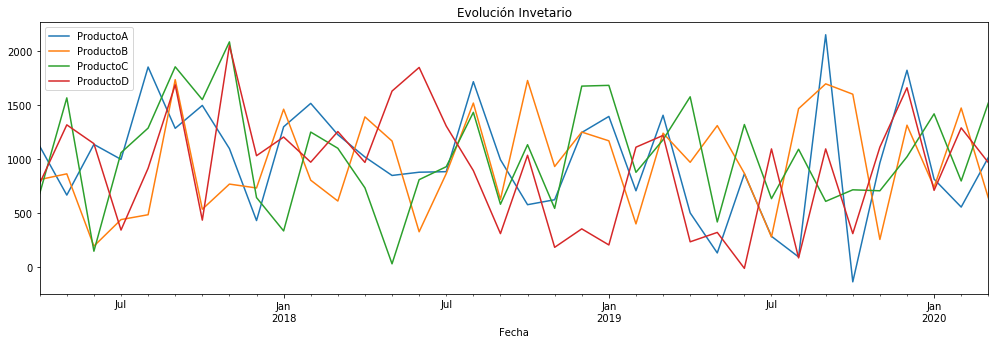

In [525]:
inventario.plot(figsize=(17,5),title='Evolución Invetario')

Aquí podemos ver algunas tendencias en la data pero aún así es muy dífcil notarlo, si queremos configurar la gráfica aún más podemos:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12db67198>,
      dtype=object)

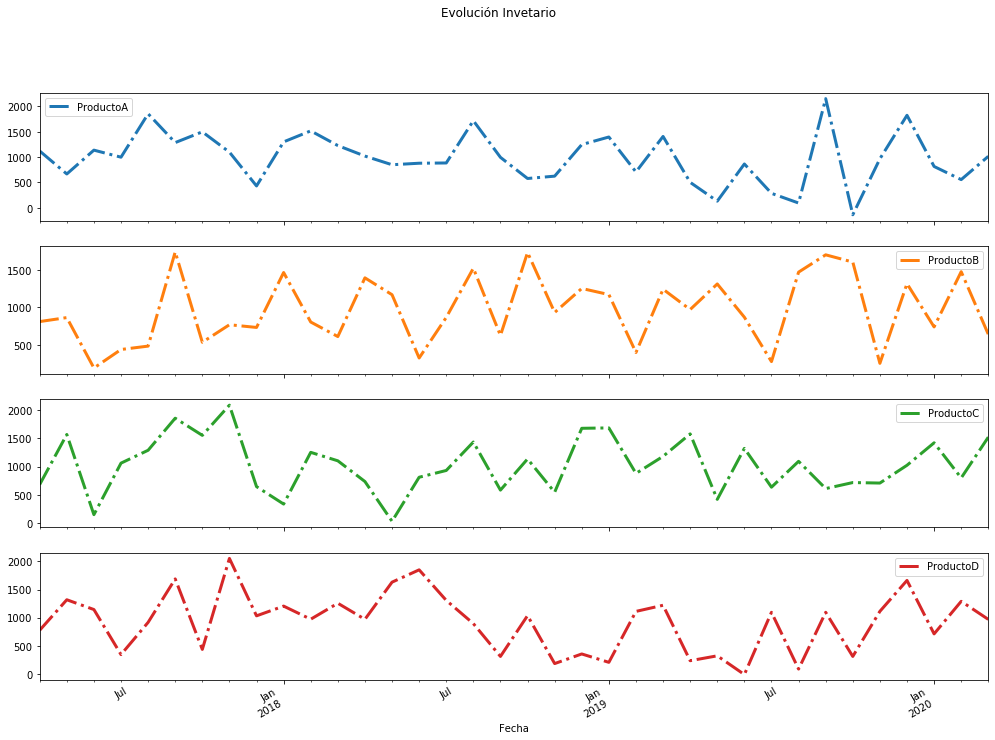

In [526]:
inventario.plot(subplots=True,figsize=(17,12),LineStyle = '-.',LineWidth=3,title='Evolución Invetario')

Si queremos ver la distribución del inventario por producto: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12db87b38>,
      dtype=object)

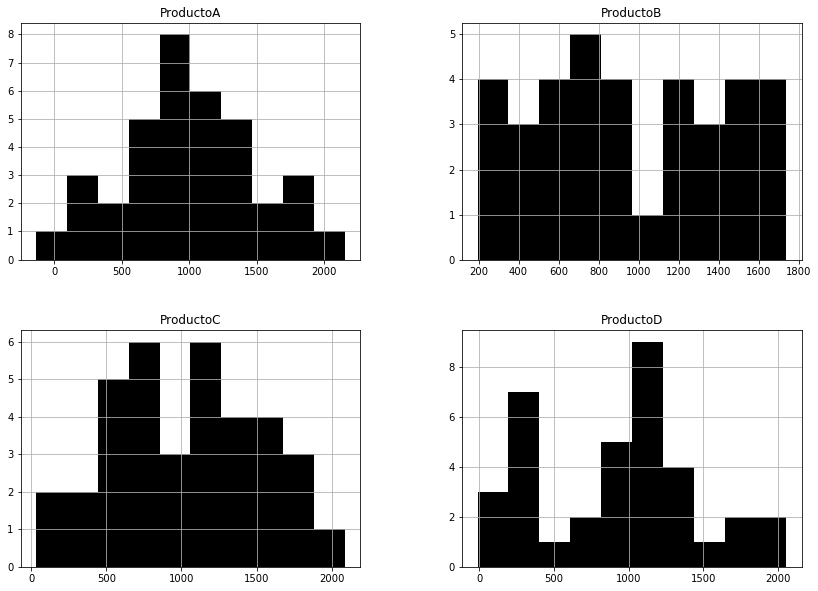

In [527]:
inventario.hist(figsize=(14,10),color='k',bins=10)

### Seleccionando y filtrando valores 

En nuestro análisis queremos entender en detalle el desempeño del último año calendario, para esto podemos filtrar según la fecha:

In [528]:
inventario[('2019' < inventario.index) & (inventario.index < '2020')]

,ProductoA,ProductoB,ProductoC,ProductoD
Fecha,,,,
2019-01-31,1397,1171,1685,206
2019-02-28,708,401,879,1112
2019-03-31,1408,1242,1181,1221
2019-04-30,503,972,1579,235
2019-05-31,132,1312,419,322
2019-06-30,865,870,1322,-11
2019-07-31,286,280,635,1096
2019-08-31,95,1469,1093,86
2019-09-30,2154,1699,610,1096


O si queremo ver como cerró el 2019 se puede:

In [529]:
inventario.loc['2019-12']

,ProductoA,ProductoB,ProductoC,ProductoD
Fecha,,,,
2019-12-31,1825,1316,1023,1663


Ahora, queremos revisar cuando nuestro inventario en el **Producto A** ha caido por debajo del nivel crítico de 200 unidades: 

In [530]:
inventario[inventario['ProductoA']<200]

,ProductoA,ProductoB,ProductoC,ProductoD
Fecha,,,,
2019-05-31,132,1312,419,322
2019-08-31,95,1469,1093,86
2019-10-31,-136,1603,717,311


y para todos los productos:

In [531]:
inventario.query('ProductoA<200 or ProductoB<200 or ProductoC<200 or ProductoD<200')

,ProductoA,ProductoB,ProductoC,ProductoD
Fecha,,,,
2017-06-30,1138,195,148,1145
2018-05-31,850,1169,31,1632
2018-11-30,625,933,545,184
2019-05-31,132,1312,419,322
2019-06-30,865,870,1322,-11
2019-08-31,95,1469,1093,86
2019-10-31,-136,1603,717,311


Por último, cuando el inventario fue negativo en algún producto:

In [532]:
inventario[(inventario<0).sum(axis=1)>0]

,ProductoA,ProductoB,ProductoC,ProductoD
Fecha,,,,
2019-06-30,865,870,1322,-11
2019-10-31,-136,1603,717,311


### Ranqueado y ordenamiendo

En ocasiones de forma general queremos saber cuales fueron los meses donde se tuvo en stock la mayor cantidad total de producto. 

Primero creamos una variable resumen del total de producto por cada mes:

In [533]:
inventario['total'] = inventario.sum(axis=1)
inventario

,ProductoA,ProductoB,ProductoC,ProductoD,total
Fecha,,,,,
2017-04-30,1121,812,682,777,3392
2017-05-31,668,865,1569,1319,4421
2017-06-30,1138,195,148,1145,2626
2017-07-31,999,441,1061,344,2845
2017-08-31,1855,486,1289,917,4547
2017-09-30,1287,1738,1857,1690,6572
2017-10-31,1499,537,1553,436,4025
2017-11-30,1099,770,2088,2054,6011
2017-12-31,432,734,645,1033,2844


Ahora si queremos saber los 5 meses con la menor cantidad de producto: 

In [534]:
inventario.sort_values(by='total').head()

,ProductoA,ProductoB,ProductoC,ProductoD,total
Fecha,,,,,
2019-05-31,132,1312,419,322,2185
2018-11-30,625,933,545,184,2287
2019-07-31,286,280,635,1096,2297
2019-10-31,-136,1603,717,311,2495
2018-09-30,996,628,583,311,2518


O con la mayor cantidad de producto:

In [535]:
inventario.sort_values(by='total',ascending=False).head()

,ProductoA,ProductoB,ProductoC,ProductoD,total
Fecha,,,,,
2017-09-30,1287,1738,1857,1690,6572
2017-11-30,1099,770,2088,2054,6011
2019-12-31,1825,1316,1023,1663,5827
2018-08-31,1719,1521,1435,895,5570
2019-09-30,2154,1699,610,1096,5559


### Función `apply`

Cuando se tratan de operaciones algebráicas en números, **Pandas** es muy bueno haciendo las operaciones a cada valor del `DataFrame` o `Series` según sea el ejemplo. Sin embargo en otro tipo de datos necesitamos de otra herramienta.

Por ejemplo, cuando queremos a partir de la fecha obtener el mes y el año usamos `apply`. `apply` aplica una función u operación a cada valor de una `Series` o cada `Series` de un `DataFrame`.

Primero creemos las funciones que queremos apliacar:

In [536]:
# Función que me retorna el mes a partir de la fecha 
def mes_de_fecha(fecha):
    return fecha.month

# Función que me retorna el año a partir de la fecha 
def ano_de_fecha(fecha):
    return fecha.year

Ahora para aplicar `apply` debemos pasar la `Fecha` a una columna:

In [537]:
inventario.reset_index('Fecha',inplace=True)
inventario

,Fecha,ProductoA,ProductoB,ProductoC,ProductoD,total
0,2017-04-30,1121,812,682,777,3392
1,2017-05-31,668,865,1569,1319,4421
2,2017-06-30,1138,195,148,1145,2626
3,2017-07-31,999,441,1061,344,2845
4,2017-08-31,1855,486,1289,917,4547
5,2017-09-30,1287,1738,1857,1690,6572
6,2017-10-31,1499,537,1553,436,4025
7,2017-11-30,1099,770,2088,2054,6011
8,2017-12-31,432,734,645,1033,2844
9,2018-01-31,1301,1464,336,1206,4307


In [538]:
inventario['mes'] = inventario['Fecha'].apply(mes_de_fecha)
inventario['ano'] = inventario['Fecha'].apply(ano_de_fecha)
inventario

,Fecha,ProductoA,ProductoB,ProductoC,ProductoD,total,mes,ano
0,2017-04-30,1121,812,682,777,3392,4,2017
1,2017-05-31,668,865,1569,1319,4421,5,2017
2,2017-06-30,1138,195,148,1145,2626,6,2017
3,2017-07-31,999,441,1061,344,2845,7,2017
4,2017-08-31,1855,486,1289,917,4547,8,2017
5,2017-09-30,1287,1738,1857,1690,6572,9,2017
6,2017-10-31,1499,537,1553,436,4025,10,2017
7,2017-11-30,1099,770,2088,2054,6011,11,2017
8,2017-12-31,432,734,645,1033,2844,12,2017
9,2018-01-31,1301,1464,336,1206,4307,1,2018


y volvemos a ubicar la `Fecha` como índice:

In [539]:
inventario.set_index(['Fecha'],inplace=True)

### Función `groupby`

La función `groupby` es una operación util cuando queremos hacer cálculos agregando o por grupos de interés. Por ejemplo si queremos saber el stock promedio por año:

In [540]:
inventario.groupby('ano').mean()

,ProductoA,ProductoB,ProductoC,ProductoD,total,mes
ano,,,,,,
2017,1122.000000,730.888889,1210.222222,1079.444444,4142.555556,8.0
2018,1070.833333,1058.666667,881.166667,998.333333,4009.000000,6.5
2019,850.333333,1049.333333,987.583333,704.166667,3591.416667,6.5
2020,796.333333,953.000000,1247.000000,991.000000,3987.333333,2.0


O la volatilidad del mismo por mes:

In [541]:
inventario.groupby('mes').std()

,ProductoA,ProductoB,ProductoC,ProductoD,total,ano
mes,,,,,,
1,311.448765,363.656890,714.926803,500.012000,407.257904,1.0
2,516.788480,542.380862,241.777446,159.418736,744.581986,1.0
3,196.217566,354.810278,222.636475,156.346837,506.952989,1.0
4,331.724786,300.111646,503.281565,381.465595,452.981604,1.0
5,373.261303,228.281259,799.842484,684.114756,1139.212155,1.0
6,153.469867,357.556056,588.637693,940.019149,632.839105,1.0
7,383.006963,303.305676,218.323918,506.580694,864.412710,1.0
8,979.240522,583.126344,171.608081,473.554995,1431.367295,1.0
9,602.402689,629.902373,727.875218,691.701043,2109.848573,1.0


En algunas veces más de una operación es necesaria o incluso necesitamos operaciones diferentes para cada producto, luego podemos usar la función `aggregate` pertenciente a `groupby`:

In [543]:
inventario.groupby('ano').aggregate({'ProductoB':[np.mean,np.std],'ProductoC':[np.median,np.std]})

ProductoB             ProductoC            
             mean         std    median         std
ano                                                
2017   730.888889  434.331798      1289  631.497977
2018  1058.666667  428.994667       871  471.271362
2019  1049.333333  502.258958       951  398.989510
2020   953.000000  454.713096      1421  391.187934

In [557]:
inventario.groupby('ano').aggregate([np.median,np.std])

ProductoA             ProductoB             ProductoC              \
        median         std    median         std    median         std   
ano                                                                      
2017    1121.0  419.042659     734.0  434.331798      1289  631.497977   
2018    1008.5  343.460156    1051.0  428.994667       871  471.271362   
2019     786.5  725.630802    1206.5  502.258958       951  398.989510   
2020     816.0  230.131122     741.0  454.713096      1421  391.187934   

     ProductoD              total                 mes            
        median         std median          std median       std  
ano                                                              
2017      1033  554.429687   4025  1408.961596    8.0  2.738613  
2018      1005  513.234544   4160   888.217111    6.5  3.605551  
2019       709  563.231719   3073  1288.398616    6.5  3.605551  
2020       970  290.070681   4122   257.878524    2.0  1.000000

### Función `pivot_table`

La última tabla nos recuerda cómo estos cálculos usualmente los hacíamos en `Excel`con tablas dinámicas. **Pandas** tiene su propia implementación a través de estas dos funciones. Si queremos replicar la anterior tabla con una leve modificación pero usando `pivot`:

In [551]:
inventario.pivot_table(index='ano',aggfunc=[np.mean,np.std])

mean                                                           \
        ProductoA    ProductoB    ProductoC    ProductoD  mes        total   
ano                                                                          
2017  1122.000000   730.888889  1210.222222  1079.444444  8.0  4142.555556   
2018  1070.833333  1058.666667   881.166667   998.333333  6.5  4009.000000   
2019   850.333333  1049.333333   987.583333   704.166667  6.5  3591.416667   
2020   796.333333   953.000000  1247.000000   991.000000  2.0  3987.333333   

             std                                                             
       ProductoA   ProductoB   ProductoC   ProductoD       mes        total  
ano                                                                          
2017  419.042659  434.331798  631.497977  554.429687  2.738613  1408.961596  
2018  343.460156  428.994667  471.271362  513.234544  3.605551   888.217111  
2019  725.630802  502.258958  398.989510  563.231719  3.605551  1288.398616  
2020  230.131122  454.713096  391.187934  290.070681  1.000000   257.878524

Para el uso de `pivot_table` tenemos infinidad de operaciones de agregacion o incluso personalizadas que hayamos creado:

In [562]:
# Defiendo funcion que dice el segundo mayor valor del año
def segundo_mayor(serie):
    return serie.sort_values(ascending=False)[1]

inventario.pivot_table(index='ano',aggfunc=segundo_mayor)

,ProductoA,ProductoB,ProductoC,ProductoD,mes,total
ano,,,,,,
2017,1499,865,1857,1690,11,6011
2018,1518,1521,1435,1632,11,4549
2019,1825,1603,1579,1221,11,5559
2020,816,741,1421,970,2,4122


In [565]:
# Defiendo funcion que dice el segundo mayor valor del año
def segundo_menor(serie):
    return serie.sort_values(ascending=True)[1]

segundos = inventario.pivot_table(index='ano',aggfunc=[segundo_mayor,segundo_menor])
segundos

segundo_mayor                                         segundo_menor  \
         ProductoA ProductoB ProductoC ProductoD mes total     ProductoA   
ano                                                                        
2017          1499       865      1857      1690  11  6011           668   
2018          1518      1521      1435      1632  11  4549           625   
2019          1825      1603      1579      1221  11  5559            95   
2020           816       741      1421       970   2  4122           816   

                                              
     ProductoB ProductoC ProductoD mes total  
ano                                           
2017       441       645       436   5  2844  
2018       613       336       311   2  2518  
2019       280       610        86   2  2297  
2020       741      1421       970   2  4122

### Funcion `stack`

Si queremos reorganizar la tabla podemos usar `stack` para bajar uno de los niveles de las columnas a ser valores de las filas:

In [566]:
segundos.stack(0)

ProductoA  ProductoB  ProductoC  ProductoD  mes  total
ano                                                                       
2017 segundo_mayor       1499        865       1857       1690   11   6011
     segundo_menor        668        441        645        436    5   2844
2018 segundo_mayor       1518       1521       1435       1632   11   4549
     segundo_menor        625        613        336        311    2   2518
2019 segundo_mayor       1825       1603       1579       1221   11   5559
     segundo_menor         95        280        610         86    2   2297
2020 segundo_mayor        816        741       1421        970    2   4122
     segundo_menor        816        741       1421        970    2   4122

### Ejercicio:

Haremos un de las ventas de un supermercado. En este ejercicio simularemos el análisis de datos con data real. El archivo `/data/modulo-2/2.4-supermarket_sales_clean.txt` tiene los datos de ventas para un periodo de tiempo del año 2019. El objetivo es:

1. Leer el archivo en formato `txt` 
2. Hacer validación de los tipos de datos y "castear" las variables según sea el caso. **Nota:** La data no está completamente limpia por lo que se debe limpiar y recuperar algunas de sus entradas sin perder información. 
3. Usando las funciones de **Pandas** calcular y responder:
    1. ¿Cuánto han sido la ventas totales por semana semana?
    2. ¿Cuál ha sido el valor del ticket promedio en la segunda mitad de Febrero de 2019?
    3. ¿Para cada mes, cuál ha sido la línea de producto con más ventas para cada género?